##**Moubani Das**
##**OasisInfobyte Aug-Sept '24**
##**Lv2,Project 1; House Price Prediction**


##Loading necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

##Uploading & Reading Dataset

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Housing.csv to Housing.csv


In [ ]:
df=pd.read_csv('Housing.csv')
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


##EDA & Data Cleaning

In [ ]:
#Columns
print(df.columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [ ]:
#Datatype of the dataset
print('Datatypes: ',df.dtypes)

Datatypes:  price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [ ]:
#Description of data
print(df.describe())

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [ ]:
#Statistical Information of dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [ ]:
#Data cleaning
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [ ]:
#checking duplicate values
print(df.duplicated().sum())


0


In [ ]:
#Handling missing values
Housing=df.dropna()

##Correlation matrix to identify relevant features in the dataset

In [ ]:
#Converting object(string) to numerica form
df = pd.get_dummies(df, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'], drop_first=True)

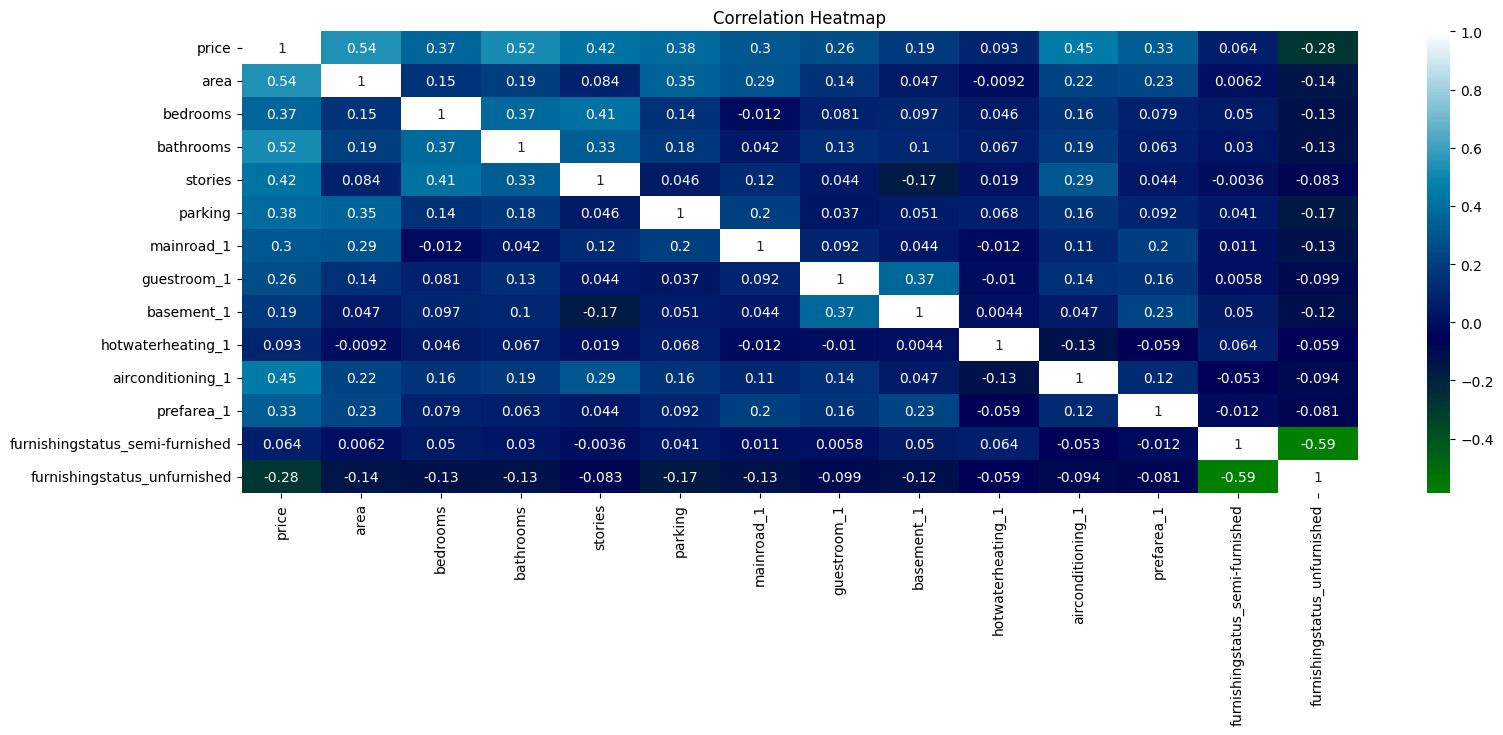

In [ ]:
#Correlation heatmap
plt.figure(figsize=(18, 6))
sns.heatmap(df.corr(), annot=True, cmap='ocean')
plt.title('Correlation Heatmap')
plt.show()


Interpretation:
* **Area and Price** has likely a strong positive correlation

* **Number of Bedrooms,Bathrooms and Price** also likely positive correlations. More bedrooms/bathrooms usually mean a higher price.  

* **Location and Price** could be positive or negative depending on the areas represented in dataset.

##Visualising top 10 features by importance.

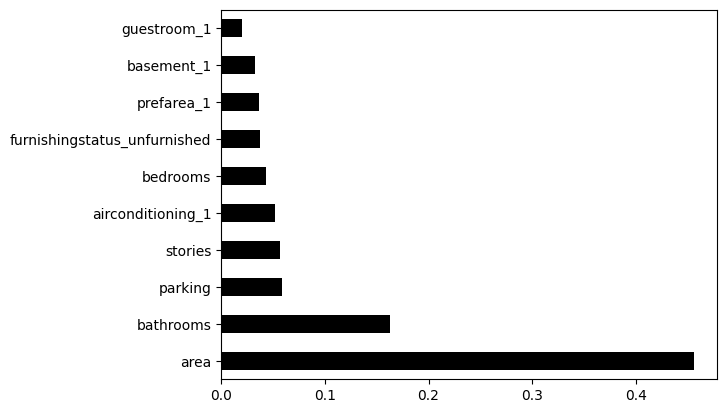

In [ ]:
from sklearn.ensemble import RandomForestRegressor
X = df.drop('price', axis=1)  # Replace 'price' with your target variable column
y = df['price']
model = RandomForestRegressor()
model.fit(X, y)
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh',color='black' )
plt.show()

##Linear Regression Model

In [ ]:
#Splitting dataset into training and testing set
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

In [ ]:
#Creating fittin linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

##Evaluating model's performance

In [ ]:
#Making predictions on test set
y_pred=model.predict(X_test)

In [ ]:
#Mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

#R squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Squared Error: 1754318687330.6638
R-squared: 0.6529242642153184


##Visualising the relationship between actual and predicted values


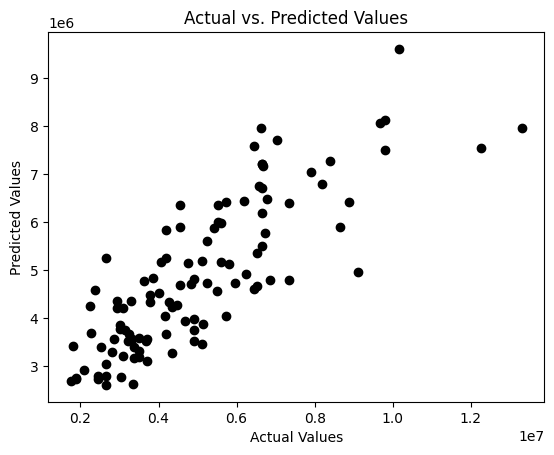

In [ ]:
#Visualise relationship betwee actual and predicted values
plt.scatter(y_test, y_pred,color='black')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()


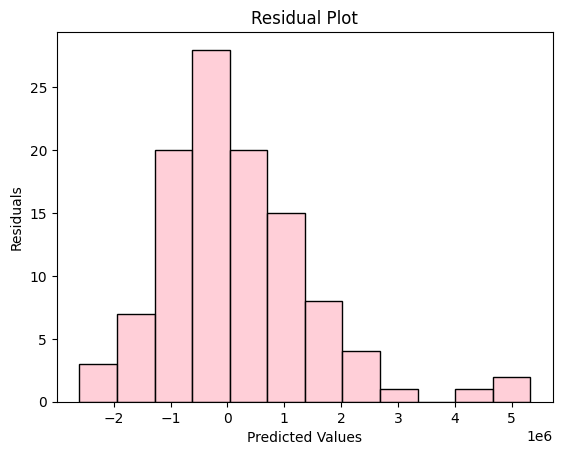

In [ ]:
#Residual plot
resd=y_test-y_pred
sns.histplot(resd, color='pink')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
